# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):

    V = np.pi**(D/2) * R**(D) /math.gamma(1 + D/2)
    return V

print('Истина_Двумер =',  getSphereVolumeExact(2, R = 1.0))
print('Истина_Трехмер =', getSphereVolumeExact(3, R = 1.0))

Истина_Двумер = 3.141592653589793
Истина_Трехмер = 4.1887902047863905


Совпадает с реальными значениями

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

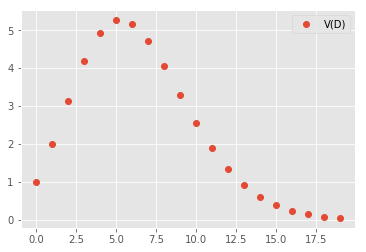

In [3]:
D = 0
x = []
V = []
for i in range(20):
    x.append(D)
    V.append(getSphereVolumeExact(D, R = 1.0))
    D += 1
plt.plot(x, V, 'o', label = 'V(D)')
plt.legend()

В пределе стремиться к нулю, ибо факториал в знаменателе

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [4]:
N = 5000
D = 3
def getSphereVolumePseudorandom(N, D, R = 1):
    a = []
    for i in range(N):
        if (np.sum((np.random.uniform(low = -1.0, high = 1.0, size = D))**2)) <= 1: #попадает или не попадает в нашу сферу
            a.append(1)
        else:
            a.append(0)
    V_k = (2*R)**D 
    n = np.sum(a)
    V_s = V_k * n / N 
    return V_s
print('Монте-Карло_Псевдослуч =',getSphereVolumePseudorandom(N, D, R = 1))
print('Истина =',getSphereVolumeExact(D, R = 1.0))

Монте-Карло_Псевдослуч = 4.36
Истина = 4.1887902047863905


Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

4.196


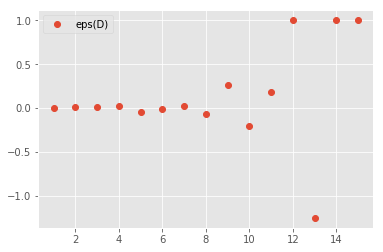

In [5]:
D = 1
N = 4000
eps_r = []
x_r = []
print(getSphereVolumePseudorandom(4000, 3, R = 1))
for i in range(15):
    x_r.append(D)
    eps_r.append((getSphereVolumeExact(D, R = 1) - getSphereVolumePseudorandom(N, D, R = 1)) / getSphereVolumeExact(D, R = 1))
    D += 1
plt.figure()
plt.plot(x_r, eps_r, 'o', label = 'eps(D)')
plt.legend()

Расходится

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [6]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq
sobol_seq.i4_sobol_generate?

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [7]:
N = 1000
D = 3
def getSphereVolumeQuasirandom(N, D, R = 1): #аналогичный код, только для соболя
    a = []
    t = (sobol_seq.i4_sobol_generate(D, N) * 2 - 1)**2
    for i in range(N):    
        if np.sum(t[i]) <= 1: #попадает или не попадает в нашу сферу 
            a.append(1)
        else:
            a.append(0)
    V_k = (2*R)**D 
    n = np.sum(a)
    V_s = V_k * n / N 
    return V_s
print('Монте-Карло_Квазислуч =', getSphereVolumeQuasirandom(N, D, R = 1))
print('Истина =',getSphereVolumeExact(D, R = 1.0))

Монте-Карло_Квазислуч = 4.216
Истина = 4.1887902047863905


Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

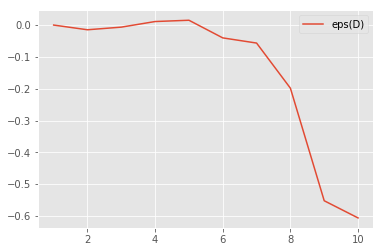

In [8]:
D = 1
N = 1000
eps_p = []
x_p = []
for i in range(10):
    x_p.append(D)
    eps_p.append((getSphereVolumeExact(D, R = 1.0) - getSphereVolumeQuasirandom(N, D, R = 1)) / getSphereVolumeExact(D, R = 1.0))
    D += 1
plt.figure()
plt.plot(x_p, eps_p, label = 'eps(D)')
plt.legend()

Расходится

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

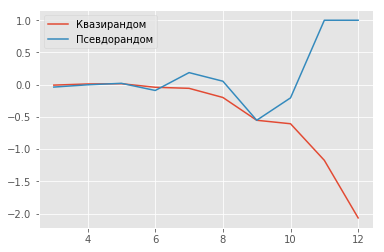

In [9]:
D = 3
N = 1000
eps_p = []
x_p = []
eps_r = []
x_r = []
for i in range(10):
    x_p.append(D)
    eps_p.append((getSphereVolumeExact(D, R = 1.0) - getSphereVolumeQuasirandom(N, D, R = 1)) / getSphereVolumeExact(D, R = 1.0))
    x_r.append(D)
    eps_r.append((getSphereVolumeExact(D, R = 1) - getSphereVolumePseudorandom(N, D, R = 1)) / getSphereVolumeExact(D, R = 1))
    D += 1
plt.figure()
plt.plot(x_p, eps_p, label = 'Квазирандом')
plt.plot(x_r, eps_r, label = 'Псевдорандом')
plt.legend()


Оба расходятся, но квазирандом медленнее

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [10]:
N = 7
def getInitialState(N):
    state = np.ones((N,N))
    x = np.ones((N,N))
    for i in range(N):
        x[i] = np.random.rand(N) 
        for j in range(N):
            if x[i][j] < 0.5: # если в случайном массив от 0 до 1 число меньше 0.5, тогда присваеваем 1, в другом случае -1
                x[i][j] = 1
            else:
                x[i][j] = -1
        state[i] = x[i]
    return state
print(getInitialState(N))


[[ 1. -1.  1. -1. -1.  1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 1. -1. -1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1.  1.]
 [-1. -1.  1. -1. -1.  1.  1.]]


2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [11]:
j = 1
i = 1
state = getInitialState(N)
def getDeltaE(i, j, state):
    state_x = state[0] #в следующих четырех строчках учитываем топологию тора
    state_f = np.row_stack((state, state_x))
    state_y = state_f[: , 0]
    statet = np. column_stack((state_f, state_y))
    
    E_new = statet[i][j] * (statet[i][j + 1] + statet[i][j - 1] + statet[i + 1][j] + statet[i - 1][j]) # по формуле считаем E
    E_old = -1 * statet[i][j] * (statet[i][j + 1] + statet[i][j - 1] + statet[i + 1][j] + statet[i - 1][j])  
    dE = E_new - E_old
    return dE
print(getDeltaE(i, j, state))
print(state)

4.0
[[ 1.  1. -1.  1. -1.  1.  1.]
 [-1.  1.  1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  1.  1. -1.]
 [ 1.  1. -1.  1.  1.  1.  1.]
 [-1. -1.  1. -1. -1. -1.  1.]
 [-1.  1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1.  1.]]


3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [12]:
T = 0.5
print(state)
def makeFlip(T, state):
    i = np.random.randint(0, N, size = N**2)
    j = np.random.randint(0, N, size = N**2)
    for k in range(N**2):
        if getDeltaE(i[k], j[k], state) <= 0:
            state[i[k]][j[k]] = -1 * state[i[k]][j[k]] # реализуем пункты 4 5 
        else:
            exp = np.exp(-1 * getDeltaE(i[k], j[k], state) / T)
            prob = np.random.choice([1, -1], p = [1 - exp, exp]) # распределение вероятностей
            state[i[k]][j[k]] = prob * state[i[k]][j[k]]
    return state
for i in range(50):
    makeFlip(T, state)
print(makeFlip(T, state))

[[ 1.  1. -1.  1. -1.  1.  1.]
 [-1.  1.  1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  1.  1. -1.]
 [ 1.  1. -1.  1.  1.  1.  1.]
 [-1. -1.  1. -1. -1. -1.  1.]
 [-1.  1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1.  1.]]
[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]]


4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [13]:
print(state)
def getEnergy(state):
    state_x = state[0] #снова учтем топологию тора
    state_f = np.row_stack((state, state_x))
    state_y = state_f[: , 0]
    statet = np.column_stack((state_f, state_y))
    E = 0
    E_0 = 0
    for j in range(N):
        for i in range(N):
            E += -1 * statet[i][j] * (statet[i][j + 1] + statet[i][j - 1] + statet[i + 1][j] + statet[i - 1][j]) 
    return E
print(getEnergy(state))

[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]]
-196.0


5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [14]:
def getMagnetization(state):  
    M = 0
    for j in range(N):
        for i in range(N):
            M += state[i][j]
    return M
print(getMagnetization(state))

-49.0


В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [15]:
N       = 10         # размер решетки NxN
Nt      = 50         # количество точек температуры
eqSteps = 200        # количество раз выполнения makeFlip для установления равновесия
steps   = 50         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

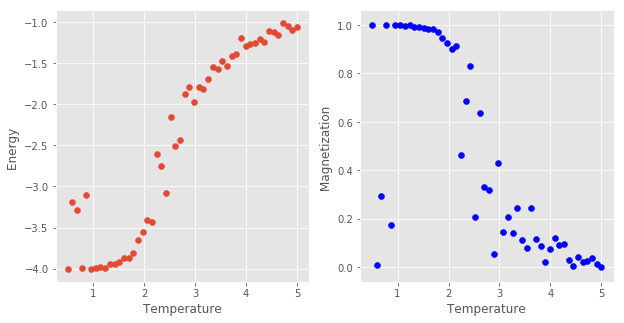

In [16]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Выше энергия выше температура. Ниже магнетизм выше температура. 

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

<Figure size 432x288 with 0 Axes>

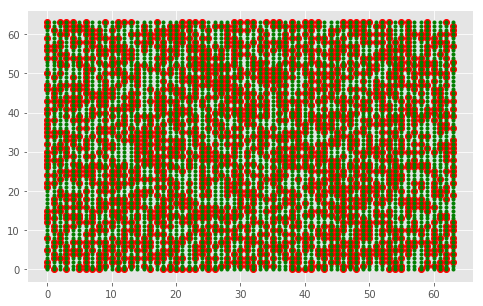

<Figure size 432x288 with 0 Axes>

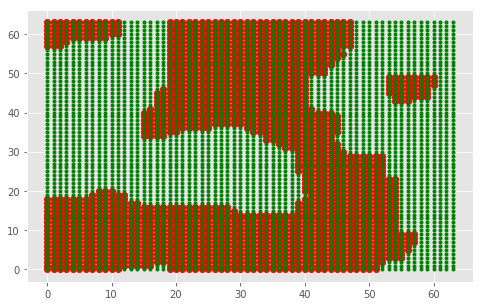

<Figure size 432x288 with 0 Axes>

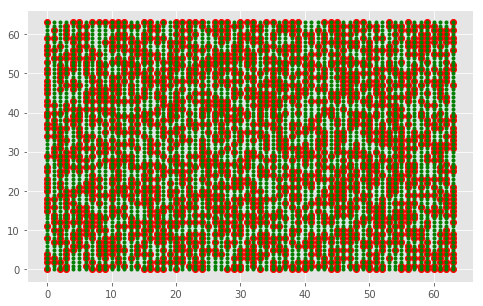

In [17]:
N = 64

def getInitialState(N): # модифицируем функцию, чтобы она выдавала массив координат точек равных -1
    a = []
    state = np.ones((N,N))
    x = np.ones((N,N))
    for i in range(N):
        x[i] = np.random.rand(N) 
        for j in range(N):
            if x[i][j] < 0.5: # если в случайном массив от 0 до 1 число меньше 0.5, тогда присваеваем 1, в другом случае -1
                x[i][j] = 1
            else:
                x[i][j] = -1
                a.append([i,j])
        state[i] = x[i]
    return state, a

def makeFlip(T, state): # модифицируем функцию, чтобы она выдавала массив с координатами точек, которые равны -1
    a = []
    i = np.random.randint(0, N, size = N**2)
    j = np.random.randint(0, N, size = N**2)
    for k in range(N**2):
        if getDeltaE(i[k], j[k], state) <= 0:
            state[i[k]][j[k]] = -1 * state[i[k]][j[k]] # реализуем пункты 4 5 
        else:
            exp = np.exp(-1 * getDeltaE(i[k], j[k], state) / T)
            prob = np.random.choice([1, -1], p = [1 - exp, exp]) 
            state[i[k]][j[k]] = prob * state[i[k]][j[k]]
    for i in range(N):
        for j in range(N):
            if state[i][j] < 0:
                a.append([i,j])
    return state, a

def tup(state, a):  
    a.append([0, 0]) # добавили элемент, чтобы не было проблем с размерностью
    plt.figure()
    plt.figure(figsize=(8, 5))
#    print(state)
    x = []
    y = []
    h = 0
    for k in range(N):
        x_0 = a[k][0] # разделили массив с координатами точек 
        y_0 = a[k][1]
    for i in range(N): # по порядку перебираем ВСЕ точки и если координаты точки совпадают 
        for j in range(N): # с координатами точки(которая равна -1),           
            x.append(i) # то мы принтим эту точку особым образом и начинаем искать совпдание
            y.append(j) # со следующей точке(которая равна -1)            
            x_0 = a[h][0]
            y_0 = a[h][1]      
            if i == x_0 and j == y_0 and h < len(a)-1:
                h += 1
                plt.plot(j ,N - 1 - i, 'o', color = 'red')    
    return plt.plot(x, y, '.', color = 'green')


 
state, a = getInitialState(N)
print(tup(state, a))

T = 0.5 # низкая температура
for i in range(50):
    makeFlip(T, state)
state, a = makeFlip(T, state)
print(tup(state, a))   

T = 100 # высокая температура
for i in range(50):
    makeFlip(T, state)
state, a = makeFlip(T, state)
print(tup(state, a))  

При низкой температуре спин опеределен областями. При высокой температуре остается лишь хаос.